In [3]:
import matplotlib.pyplot as plt
import cv2



In [8]:
def initialize_count(level):
    for i in range(level):
        count_list.append(0)


def count_all(image):
    for i in image:
        for j in i:
            for k in j:
                count_list[k] += 1


def reduce_histogram():
    for i in range(21):
        count_list[i] = 0
    for i in range(235, 256):
        count_list[i] = 0

def stretch_histogram(xmin, xmax, ymin, ymax):
    x_stretch_data = []
    y_stretch_data = []
    for x in range(xmin, xmax+1):
        y = round((x-xmin) / (xmax-xmin)*(ymax-ymin) + ymin)
        x_stretch_data.append(y)
        y_stretch_data.append(count_list[x])
    return x_stretch_data, y_stretch_data


def stretch_image(image, x_stretch_data, xmin, xmax):
    for i in range(len(image)):
        for j in range(len(image[i])):
            for k in range(len(image[i][j])):
                if image[i][j][k] < xmin or image[i][j][k] > xmax:
                    image[i][j][k] = 0
                else:
                    image[i][j][k] = x_stretch_data[image[i][j][k]-xmin]
    return image

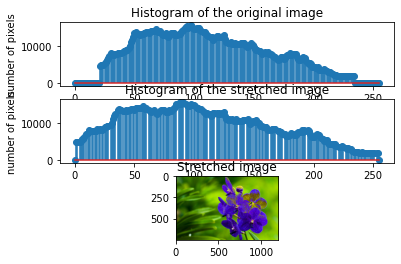

In [10]:
if __name__ == "__main__":
    count_list = []
    orchid = plt.imread('./orchid-flower.jpg')
    orchid_to_stretch = orchid
    level = 256
    
    x_data = [i for i in range(256)]
    initialize_count(level)
    count_all(orchid)

    reduce_histogram()  # comment this
    plt.subplot(3, 1, 1)
    plt.stem(x_data, count_list)
    plt.xlabel('intensity value')
    plt.ylabel('number of pixels')
    plt.title('Histogram of the original image')
    plt.subplot(3, 1, 2)
    x_st_data, y_st_data = stretch_histogram(20, 235, 0, 255)
    plt.stem(x_st_data, y_st_data)
    plt.xlabel('intensity value')
    plt.ylabel('number of pixels')


    plt.title('Histogram of the stretched image')
    st_im = stretch_image(orchid_to_stretch, x_st_data, 20, 235)
    plt.subplot(3, 1, 3)
    plt.imshow(st_im)
    plt.title('Stretched image')
    plt.show()
    